# AI-Powered Mental Health Prediction Using Machine Learning

**Author**: Iqra Fatima Umang (MCA2024161), Aafreen (MCA2024069) 
**Conference**: ICACTA 2025  

This notebook explores the use of Machine Learning algorithms to predict mental health (depression) in students. We compare models like Logistic Regression, SVM, and Random Forest and evaluate their performance using standard metrics.

### Abstract





## 1. Importing Libraries

In [7]:
!pip install tabulate
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Data Loading and Initial Exploration

### Dataset Overview

This dataset, sourced from Kaggle, contains self-reported data from 502 students. Each record includes academic pressure, study satisfaction, sleep patterns, and more—factors associated with student well-being.

#### Ethical Consideration
This data concerns sensitive mental health information. All analyses were conducted with anonymized data and solely for research purposes.

#### Feature Descriptions

| Column                                  | Description                                                  | Type      |
|-----------------------------------------|--------------------------------------------------------------|-----------|
| Gender                                  | Student's gender (Male/Female/Other)                         | Categorical |
| Age                                     | Student's age in years                                       | Numerical |
| Academic Pressure                       | Self-reported academic stress (scale 0–10)                   | Numerical |
| Study Satisfaction                      | Satisfaction with current study experience (scale 0–10)      | Numerical |
| Sleep Duration                          | Duration of sleep (e.g., "<6 hours", "6-8 hours")            | Categorical |
| Dietary Habits                          | Eating habits (Healthy/Unhealthy)                            | Categorical |
| Have you ever had suicidal thoughts?    | Yes/No response                                              | Categorical |
| Study Hours                             | Average daily study time in hours                            | Numerical |
| Financial Stress                        | Level of financial stress (scale or score)                   | Numerical |
| Family History of Mental Illness        | Yes/No response                                              | Categorical |
| Depression                              | Target label (Yes = Depressed, No = Not Depressed)           | Categorical |


In [8]:
df = pd.read_csv(r'C:\Users\Izzat Ali\Downloads\Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


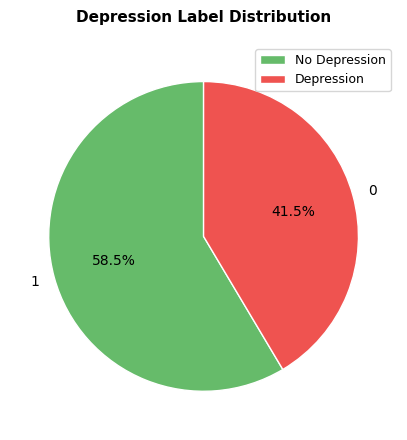

In [9]:
# Pie Chart for depression

# Counting the depression labels
label_counts = df['Depression'].value_counts()

colors = ['#66bb6a', '#ef5350']  # light green, coral red

plt.figure(figsize=(4.5, 4.5))  
wedges, texts, autotexts = plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': 'white'}
)


plt.title('Depression Label Distribution', fontsize=11, fontweight='bold', pad=15)


plt.legend(wedges, ['No Depression', 'Depression'], loc='best', fontsize=9)


plt.tight_layout()
plt.show()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [11]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [12]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int64  
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  int64  
 11  Di

## 3. Data Preprocessing

In this section, we prepared the dataset for further analysis and model building. The following steps were performed:

- **Text Cleaning:** Cleaned the text data to remove any irrelevant characters or inconsistencies.
- **Binary Encoding:** Converted binary categorical variables such as *Gender*, *Have you ever had suicidal thoughts?*, *Family History of Mental Illness*, and *Depression* into numerical values using manual mapping (`Yes` = 1, `No` = 0).
- **Label Encoding:** Applied label encoding on multi-class categorical columns like *Sleep Duration* and *Dietary Habits* using `LabelEncoder`.
- **Handling Missing Values:** Checked for and handled missing values to ensure data quality before model training.

In [22]:
# Clean text columns before encoding
df['Gender'] = df['Gender'].str.strip().str.title()
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].str.strip().str.title()
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].str.strip().str.title()
df['City'] = df['City'].str.strip().str.title()
df['Profession'] = df['Profession'].str.strip().str.title()
df['Degree'] = df['Degree'].str.strip().str.title()
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].str.strip().str.title()

In [23]:
# Encoding binary columns
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
df['Depression'] = df['Depression'].map({'Yes': 1, 'No': 0})


In [14]:
# Label Encoding for other categorical columns
le = LabelEncoder()
df['Sleep Duration'] = le.fit_transform(df['Sleep Duration'])
df['Dietary Habits'] = le.fit_transform(df['Dietary Habits'])

In [17]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,0,0,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,0,1,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,2,0,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,1,1,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,0,1,M.Tech,Yes,1.0,1.0,No,0


In [18]:
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


## 4. Exploratory Data Analysis (EDA)

In [19]:
#EDA
import plotly.express as px
corr_matrix = df.corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,  # shows the correlation values
    color_continuous_scale='RdBu_r',
    title="Correlation Heatmap",
    aspect="auto"
)

fig.show()

ValueError: could not convert string to float: 'Visakhapatnam'

>### Correlation Heatmap Analysis
>
>The heatmap above visualizes the Pearson correlation between all numerical features in the dataset, including the target variable `Depression`.
>
>**Key Observations:**
>
>- `Academic Pressure` shows a **moderate positive correlation (0.47)** with `Depression`, suggesting that students facing higher academic pressure are more likely to report depression.
>- `Study Satisfaction` has a **negative correlation (-0.29)** with `Depression`, implying that students who are satisfied with their studies tend to have better mental health.
>- `Financial Stress`, `Study Hours`, and `Family History of Mental Illness` also show **weak positive correlations** with depression, indicating potential influence.
>- Other features like `Gender`, `Age`, and `Sleep Duration` show minimal correlation with `Depression`, suggesting limited direct influence.
>
>While correlation does not imply causation, this analysis provides useful insights for feature selection and understanding the underlying factors affecting student mental health.


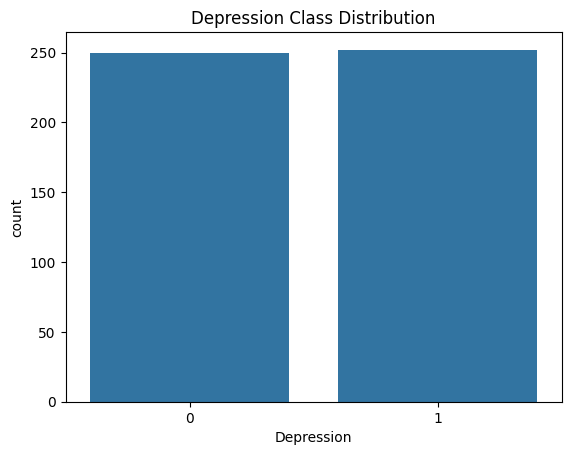

In [13]:
# Class distribution
sns.countplot(x='Depression', data=df)
plt.title('Depression Class Distribution')
plt.show()

>### Class Distribution of Depression
>
>The bar chart above illustrates the distribution of the target variable **"Depression"** in the dataset:
>
>- `0` represents students **not experiencing depression**.
>- `1` represents students **experiencing depression**.
>
>As observed, the dataset is **well-balanced**, with nearly equal instances for both classes. This balance is highly beneficial for training machine learning models, as it ensures that the model is not biased toward either class. A balanced dataset enhances the reliability and fairness of the model’s predictions, especially for classification tasks.


## 5. Train-Test Split

In [14]:
# Feature matrix and target
X = df.drop('Depression', axis=1)
y = df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Model Training and Evaluation

In [15]:
# Logistic Regression
lr = Pipeline([
    ('scaler', StandardScaler()),          # Feature scaling
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))  # Model
])

# Fit the pipeline on training data
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Evaluation
print('Logistic Regression Report :')
print(classification_report(y_test, y_pred_lr))
print('Accuracy Score:', accuracy_score(y_test, y_pred_lr))


Logistic Regression Report :
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.96      1.00      0.98        53

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101

Accuracy Score: 0.9801980198019802


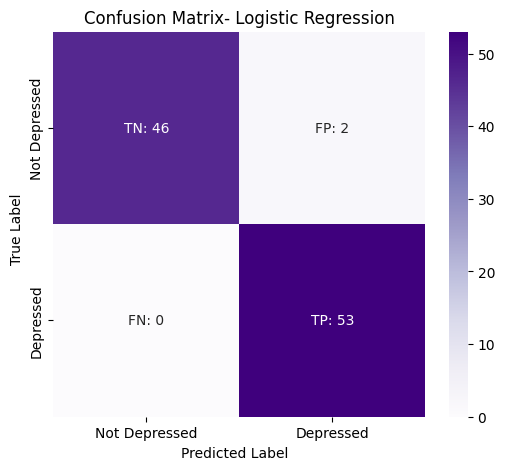

In [16]:
#'Confusion Matrix- Logistic Regression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Define custom labels for the 2x2 matrix
labels = np.array([
    [f"TN: {cm_lr[0, 0]}", f"FP: {cm_lr[0, 1]}"],
    [f"FN: {cm_lr[1, 0]}", f"TP: {cm_lr[1, 1]}"]
])

# Plot with seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=labels, fmt='', cmap='Purples', xticklabels=['Not Depressed', 'Depressed'], yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel('Predicted Label  ')
plt.ylabel('True Label  ')
plt.title('Confusion Matrix- Logistic Regression')
plt.show()



>### Confusion Matrix – Logistic Regression
>
>This confusion matrix illustrates the performance of the Logistic Regression model in classifying student mental health.
>
>- **True Positives (TP = 53):** Depressed students correctly predicted as depressed.
>- **True Negatives (TN = 46):** Non-depressed students correctly predicted as not depressed.
>- **False Positives (FP = 2):** Non-depressed students incorrectly predicted as depressed.
>- **False Negatives (FN = 0):** Depressed student incorrectly predicted as not depressed.
>
>The model shows a strong balance between precision and recall, with very few misclassifications. It demonstrates the Logistic Regression model’s reliability in identifying both depressed and non-depressed individuals.


In [17]:
# Cross-validation - Logistic Regression
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr, X, y, cv=5) 
print("Logistic Regression Cross-validation Accuracy Scores:", lr_scores)
print("Logistic Regression Mean Accuracy:", lr_scores.mean())


Logistic Regression Cross-validation Accuracy Scores: [0.93069307 0.95049505 0.96       0.95       0.98      ]
Logistic Regression Mean Accuracy: 0.9542376237623763


>###  Cross-Validation Results for Logistic Regression
>
>The 5-fold cross-validation scores for Logistic Regression show consistently high performance across all splits, with accuracy ranging from approximately 93% to 98%.  
This indicates that the model is stable and generalizes well on different subsets of the data.  
The mean accuracy of **95.42%** supports the reliability of Logistic Regression in predicting depression in students based on the given features.


In [18]:
#SVM
svmp = Pipeline([
    ('scaler', StandardScaler()),         # Feature scaling
    ('svm', SVC(probability=True, random_state=42))  # Model
])

svmp.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svmp.predict(X_test)

# Evaluation
print('SVM Report:')
print(classification_report(y_test, y_pred_svm))
print('Accuracy Score:', accuracy_score(y_test, y_pred_svm))

SVM Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.95      1.00      0.97        53

    accuracy                           0.97       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101

Accuracy Score: 0.9702970297029703


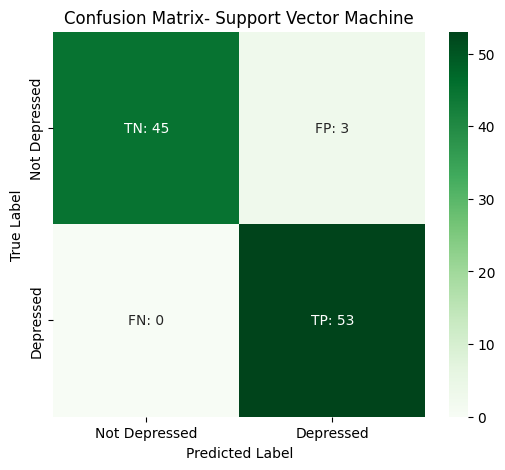

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Define custom labels for TP, TN, FP, FN
labels_svm = np.array([
    [f"TN: {cm_svm[0, 0]}", f"FP: {cm_svm[0, 1]}"],
    [f"FN: {cm_svm[1, 0]}", f"TP: {cm_svm[1, 1]}"]
])

# Plot confusion matrix with custom annotations
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=labels_svm, fmt='', cmap='Greens',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- Support Vector Machine')
plt.show()



>### Confusion Matrix – SVM (Support Vector Machine)
>
>This confusion matrix shows the classification performance of the SVM model in detecting student depression.
>
>- **True Positives (TP = 53):** Depressed students correctly identified as depressed.
>- **True Negatives (TN = 45):** Non-depressed students correctly identified as not depressed.
>- **False Positives (FP = 3):** Non-depressed students incorrectly predicted as depressed.
>- **False Negatives (FN = 0):** Depressed students incorrectly predicted as not depressed.
>
>While the model maintains a reasonable balance, it has a relatively higher false negative rate compared to Logistic Regression and Random Forest. This means more depressed students were missed, which is critical in mental health predictions. Therefore, while SVM performs decently, it may not be the most suitable model when minimizing false negatives is a priority.


In [20]:
# Cross-validation - Support Vector Machine
svm_scores = cross_val_score(svmp, X, y, cv=5)  
print("SVM Cross-validation Accuracy Scores:", svm_scores)
print("SVM Mean Accuracy:", svm_scores.mean())


SVM Cross-validation Accuracy Scores: [0.9009901  0.93069307 0.9        0.95       0.95      ]
SVM Mean Accuracy: 0.9263366336633665


>###  Cross-Validation Results for Support Vector Machine (SVM)
>
>The 5-fold cross-validation scores for the Support Vector Machine model vary between approximately 90% and 95%.  
This variability suggests that the model's performance is less stable across different data splits, which may indicate sensitivity to the training data or a need for hyperparameter tuning.  
The mean accuracy of **92.63%** shows that SVM performs moderately well, but not as reliably as Random Forest or Logistic Regression on this dataset.


In [21]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Report:')
print(classification_report(y_test, y_pred_rf))
print('Accuracy Score:', accuracy_score(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        48
           1       0.88      0.98      0.93        53

    accuracy                           0.92       101
   macro avg       0.93      0.92      0.92       101
weighted avg       0.93      0.92      0.92       101

Accuracy Score: 0.9207920792079208


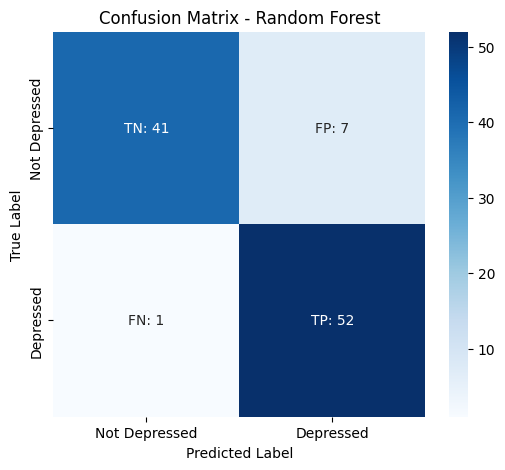

In [22]:
#Random Forest - Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Define custom labels for each cell
labels_rf = np.array([
    [f"TN: {cm_rf[0, 0]}", f"FP: {cm_rf[0, 1]}"],
    [f"FN: {cm_rf[1, 0]}", f"TP: {cm_rf[1, 1]}"]
])

# Plot confusion matrix with labeled cells
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=labels_rf, fmt='', cmap='Blues',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


>### Confusion Matrix – Random Forest
>
>The confusion matrix provides a detailed breakdown of the Random Forest model’s classification results.
>
>- **True Positives (TP = 52):** Students who were actually depressed and correctly predicted as depressed.
>- **True Negatives (TN = 41):** Students who were not depressed and correctly identified as not depressed.
>- **False Positives (FP = 7):** Students who were not depressed but incorrectly classified as depressed.
>- **False Negatives (FN = 1):** Students who were depressed but incorrectly predicted as not depressed.
>.


## 7. Evaluation of Class 1 Performance Metrics

### 7.1 Model Performance Comparision Based on Class 1 Metrics

In [26]:
from tabulate import tabulate  

# === Class 1 metrics ===
precision_lr = precision_score(y_test, y_pred_lr, pos_label=1)
recall_lr = recall_score(y_test, y_pred_lr, pos_label=1)
f1_lr = f1_score(y_test, y_pred_lr, pos_label=1)

precision_svm = precision_score(y_test, y_pred_svm, pos_label=1)
recall_svm = recall_score(y_test, y_pred_svm, pos_label=1)
f1_svm = f1_score(y_test, y_pred_svm, pos_label=1)

precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)

# === Accuracy ===
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_rf = accuracy_score(y_test, y_pred_rf)

# === Create DataFrame ===
compare_class1 = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [acc_lr, acc_svm, acc_rf],
    'Precision (Class 1)': [precision_lr, precision_svm, precision_rf],
    'Recall (Class 1)': [recall_lr, recall_svm, recall_rf],
    'F1 Score (Class 1)': [f1_lr, f1_svm, f1_rf]
})

# === Convert to % and format ===
compare_class1.iloc[:, 1:] = (compare_class1.iloc[:, 1:] * 100).round(2).astype(str) + '%'

# === Print nicely ===
print(tabulate(compare_class1, headers='keys', tablefmt='pretty', showindex=False))

+---------------------+----------+---------------------+------------------+--------------------+
|        Model        | Accuracy | Precision (Class 1) | Recall (Class 1) | F1 Score (Class 1) |
+---------------------+----------+---------------------+------------------+--------------------+
| Logistic Regression |  98.02%  |       96.36%        |      100.0%      |       98.15%       |
|         SVM         |  97.03%  |       94.64%        |      100.0%      |       97.25%       |
|    Random Forest    |  92.08%  |       88.14%        |      98.11%      |       92.86%       |
+---------------------+----------+---------------------+------------------+--------------------+


C:\Users\Izzat Ali\AppData\Local\Temp\ipykernel_19132\861589628.py:31: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    98.02%
1    97.03%
2    92.08%
Name: Accuracy, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

C:\Users\Izzat Ali\AppData\Local\Temp\ipykernel_19132\861589628.py:31: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    96.36%
1    94.64%
2    88.14%
Name: Precision (Class 1), dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

C:\Users\Izzat Ali\AppData\Local\Temp\ipykernel_19132\861589628.py:31: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    100.0%
1    100.0%
2    98.11%
Name: Recall (Class 1), dtype: object' has dtype incompatible with fl

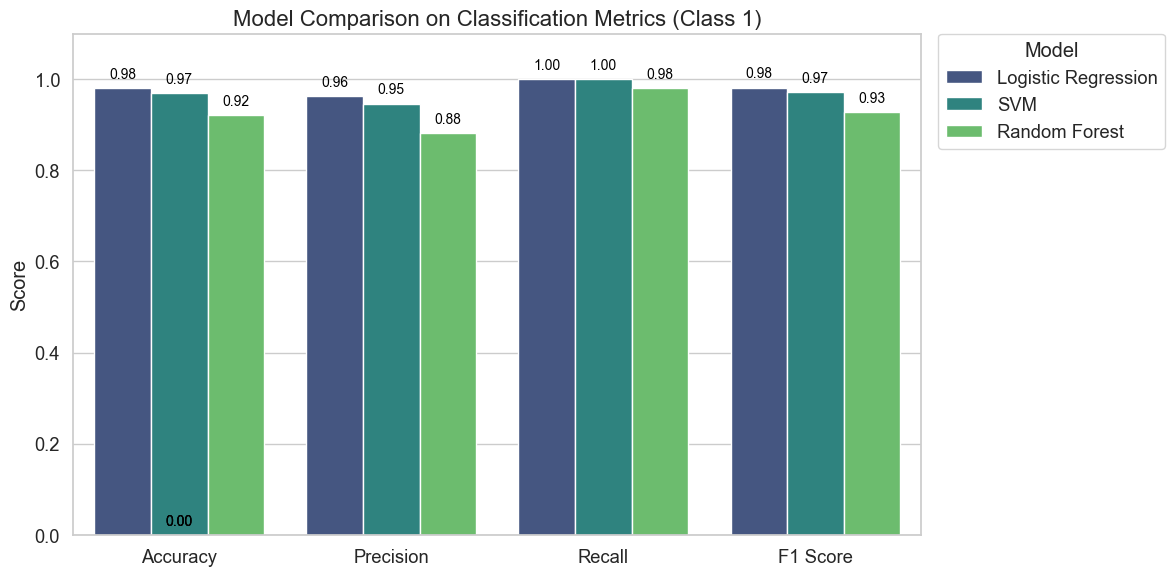

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recreate the melted metrics DataFrame
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [acc_lr, acc_svm, acc_rf],
    'Precision': [precision_lr, precision_svm, precision_rf],
    'Recall': [recall_lr, recall_svm, recall_rf],
    'F1 Score': [f1_lr, f1_svm, f1_rf]
})

metrics_melted = pd.melt(metrics_df, id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", font_scale=1.2)

barplot = sns.barplot(
    data=metrics_melted,
    x='Metric',
    y='Score',
    hue='Model',
    palette='viridis'
)

# Annotate bars with values
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f'{height:.2f}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=10, color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Improve layout
plt.title('Model Comparison on Classification Metrics (Class 1)', fontsize=16)
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xlabel('')

# Move legend outside
plt.legend(title='Model', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


### 7.2 Model Comparison and ROC Curves

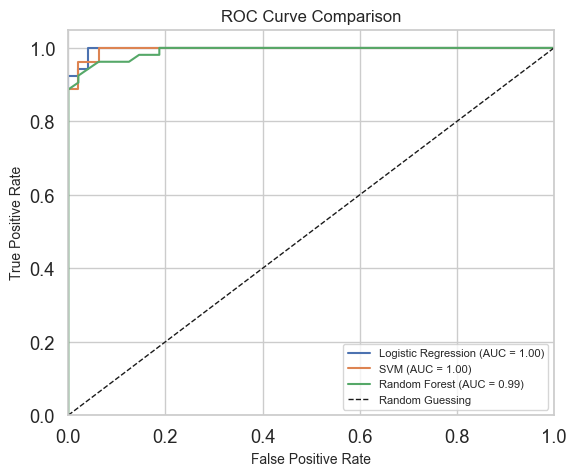

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for class 1
y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_svm = svmp.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves (compact version)
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', linewidth=1.5)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', linewidth=1.5)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', linewidth=1.5)

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', linewidth=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve Comparison', fontsize=12)
plt.legend(loc='lower right', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


>### Model Comparison using ROC Curve
>
>write about it

>###  Model Selection Rationale
>
>In this study, multiple supervised learning models—namely Logistic Regression (LR), Support Vector Machine (SVM), and Random Forest (RF)—were systematically evaluated for the task of predicting mental health status among students.
>
>Among these, **Logistic Regression stood out** not only for its simplicity and interpretability but also for its **exceptional classification >performance**. It achieved a high accuracy of **98.02%**, with an **F1-score of 0.98 for both classes**.
>
>Since the primary goal of this research is to **identify students who may be experiencing depression**, performance on **Class 1 (Depressed)** was considered most critical. For this class, Logistic Regression achieved a **recall of 1.00**, ensuring that **no depressed individuals were missed**. It also recorded a **precision of 0.96** and an **F1-score of 0.98** for the same class, indicating both reliability and balance in predictions.
>
>Additionally, the model's **ROC Curve showed an AUC of 1.00**, reflecting its outstanding ability to distinguish between depressed and non-depressed students across all classification thresholds.
>
>Considering these strengths—especially in terms of Class 1 performance—Logistic Regression was chosen as the final model for further fine-tuning and regularization analysis.


## 8. Model Interpretation : Feature Importance Based on Logistic Regression Coefficients

>  The chart below highlights the top 10 most important features identified by the Logistic Regression model. These features contributed the most to predicting student depression. 


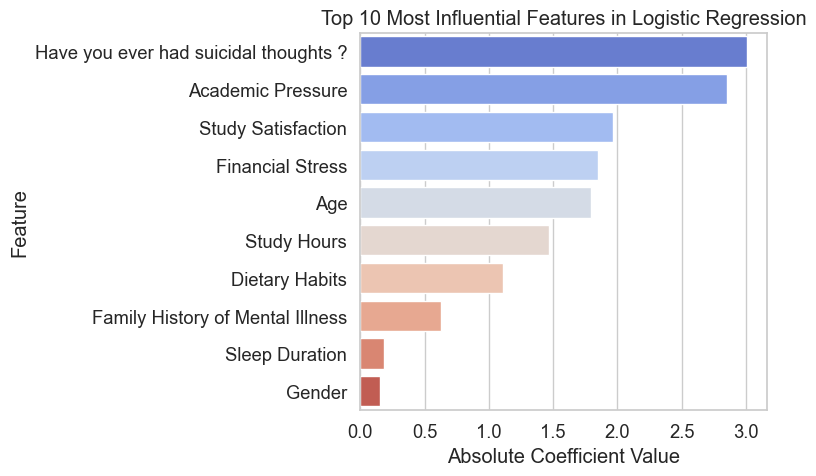

In [29]:
import matplotlib.pyplot as plt

# Get feature names and coefficients from pipeline
features = X_train.columns
coefficients = lr.named_steps['logreg'].coef_[0]

# Create DataFrame of feature importances
lr_feat_imp = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Get absolute values for importance, but keep original signs
lr_feat_imp['Abs_Coefficient'] = np.abs(lr_feat_imp['Coefficient'])

# Sort by absolute coefficient
lr_feat_imp = lr_feat_imp.sort_values(by='Abs_Coefficient', ascending=False)

# Plot top 10 features (reduced size)
plt.figure(figsize=(8, 5))
sns.barplot(x='Abs_Coefficient', y='Feature', data=lr_feat_imp.head(10), hue='Feature', palette='coolwarm', legend=False)
plt.title('Top 10 Most Influential Features in Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## 9. Hyperparameter Tuning (LR)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid using the correct pipeline step name
param_grid_lr = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['lbfgs', 'liblinear'],
}

# GridSearchCV on pipeline 'lr'
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

# Best results
print('Best Parameters for Logistic Regression:', grid_lr.best_params_)
print('Best Cross-Validation Accuracy:', grid_lr.best_score_)



Best Parameters for Logistic Regression: {'logreg__C': 10, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.9576543209876542


> ###  Hyperparameter Tuning: Logistic Regression
>
>To enhance the performance of the Logistic Regression model, hyperparameter tuning was performed using **GridSearchCV**. The tuning process explored various combinations of regularization strength, penalty type, and solver.
>
>**Best Parameters Identified:**
>- `C`: **10**
>- `penalty`: **l2**
>- `solver`: **lbfgs**
>
>**Best Cross-Validation Accuracy:** **95.77%**
>


In [31]:
# Re-train model with best parameters
# Use the best estimator from GridSearch
best_lr = grid_lr.best_estimator_

# Predict on test data
y_pred_best = best_lr.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, accuracy_score

print("Tuned Logistic Regression Report:")
print(classification_report(y_test, y_pred_best))
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))


Tuned Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.96      1.00      0.98        53

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101

Test Accuracy: 0.9801980198019802


>### Tuned Logistic Regression - Evaluation Results
>
>After performing hyperparameter tuning with GridSearchCV, the logistic regression model was retrained using the best parameters. Interestingly, the evaluation metrics remained consistent with the untuned model, indicating that the default configuration was already optimal for this dataset.
>
>- **Test Accuracy**: **98.02%**
>- **Precision**:  
>   Not Depressed: **1.00**  
>   Depressed: **0.96**
>- **Recall**:  
>   Not Depressed: **0.96**  
>   Depressed: **1.00**
>- **F1-Score**:  
>   Not Depressed: **0.98**  
>   Depressed: **0.98**
>
>These results suggest that the model is already well-calibrated and capable of making accurate predictions without significant tuning.




In [32]:
#table compare tuned untuned
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Untuned LR predictions (already fitted and predicted earlier)
y_pred_untuned = lr.predict(X_test)  # 'lr' is your pipeline with StandardScaler + LogisticRegression

# Tuned LR predictions (fitted from GridSearchCV)
best_lr = grid_lr.best_estimator_
y_pred_tuned = best_lr.predict(X_test)

# Collect scores
comparison = {
    "Metric": ["Accuracy", "Precision (Class 1)", "Recall (Class 1)", "F1 Score (Class 1)"],
    "Untuned LR": [
        accuracy_score(y_test, y_pred_untuned),
        precision_score(y_test, y_pred_untuned, pos_label=1),
        recall_score(y_test, y_pred_untuned, pos_label=1),
        f1_score(y_test, y_pred_untuned, pos_label=1)
    ],
    "Tuned LR": [
        accuracy_score(y_test, y_pred_tuned),
        precision_score(y_test, y_pred_tuned, pos_label=1),
        recall_score(y_test, y_pred_tuned, pos_label=1),
        f1_score(y_test, y_pred_tuned, pos_label=1)
    ]
}

# Convert to DataFrame and display
comparison_df = pd.DataFrame(comparison)
comparison_df["Untuned LR"] = comparison_df["Untuned LR"].apply(lambda x: f"{x*100:.2f}%")
comparison_df["Tuned LR"] = comparison_df["Tuned LR"].apply(lambda x: f"{x*100:.2f}%")

print(comparison_df.to_string(index=False))


             Metric Untuned LR Tuned LR
           Accuracy     98.02%   98.02%
Precision (Class 1)     96.36%   96.36%
   Recall (Class 1)    100.00%  100.00%
 F1 Score (Class 1)     98.15%   98.15%


>#### After applying GridSearchCV to tune hyperparameters (C, solver) of Logistic Regression, the best parameters found were C=10, solver='lbfgs', and penalty='l2'. However, the evaluation metrics on the test set remained unchanged compared to the default model. This indicates that the model was already performing optimally on the given dataset, and further tuning did not significantly impact performance.

## Lasso

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create pipeline with L1 penalty
lasso_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42))
])

# Fit the model
lasso_lr.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso_lr.predict(X_test)

# Evaluate
print("Lasso (L1) Logistic Regression Report:")
print(classification_report(y_test, y_pred_lasso))
print("Accuracy Score:", accuracy_score(y_test, y_pred_lasso))


Lasso (L1) Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.96      1.00      0.98        53

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101

Accuracy Score: 0.9801980198019802


In [34]:
#table to compare Untuned LR Tuned LR Lasso LR
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Lasso predictions
y_pred_lasso = lasso_lr.predict(X_test)

# Table
comparison = {
    "Metric": ["Accuracy", "Precision (Class 1)", "Recall (Class 1)", "F1 Score (Class 1)"],
    "Untuned LR": [
        accuracy_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr, pos_label=1),
        recall_score(y_test, y_pred_lr, pos_label=1),
        f1_score(y_test, y_pred_lr, pos_label=1)
    ],
    "Tuned LR": [
        accuracy_score(y_test, y_pred_tuned),
        precision_score(y_test, y_pred_tuned, pos_label=1),
        recall_score(y_test, y_pred_tuned, pos_label=1),
        f1_score(y_test, y_pred_tuned, pos_label=1)
    ],
    "Lasso LR": [
        accuracy_score(y_test, y_pred_lasso),
        precision_score(y_test, y_pred_lasso, pos_label=1),
        recall_score(y_test, y_pred_lasso, pos_label=1),
        f1_score(y_test, y_pred_lasso, pos_label=1)
    ]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison)

# Format as percentage
for col in ["Untuned LR", "Tuned LR", "Lasso LR"]:
    comparison_df[col] = comparison_df[col].apply(lambda x: f"{x*100:.2f}%")

# Display the table
print(comparison_df.to_string(index=False))


             Metric Untuned LR Tuned LR Lasso LR
           Accuracy     98.02%   98.02%   98.02%
Precision (Class 1)     96.36%   96.36%   96.36%
   Recall (Class 1)    100.00%  100.00%  100.00%
 F1 Score (Class 1)     98.15%   98.15%   98.15%


### Model Selection Verdict
In this study, multiple supervised learning models—namely Logistic Regression (LR), Support Vector Machine (SVM), and Random Forest (RF)—were systematically evaluated for the task of predicting mental health status among students. Among these, Logistic Regression consistently demonstrated competitive performance, achieving high classification accuracy with greater model interpretability and lower computational complexity. Consequently, Logistic Regression was selected for further optimization and regularization analysis.

To explore potential performance gains, three variants of Logistic Regression were investigated:
(i) a baseline untuned LR model,
(ii) a tuned LR model optimized using GridSearchCV, and
(iii) an L1-regularized LR model (Lasso).

Surprisingly, all three configurations yielded identical performance metrics on the held-out test set, with an accuracy of 98.02%, precision of 96.36%, recall of 100.00%, and an F1-score of 98.15% for the positive class. This result suggests that the dataset exhibits well-separated class distributions, enabling high predictive performance even without model tuning or regularization.

Given the absence of measurable improvement through hyperparameter optimization or L1 regularization, and in accordance with Occam’s Razor, the untuned Logistic Regression model is deemed most suitable. It balances predictive strength with model simplicity, computational efficiency, and interpretability—qualities essential for real-world deployment in mental health screening applications.



##  Summary of Model Performance

The table below compares the performance of three supervised learning models on the task of predicting student depression, with a particular focus on **Class 1 (Depressed)** metrics, which are critical for this study.

| Model               | Accuracy | Precision (Class 1) | Recall (Class 1) | F1 Score (Class 1) |
|--------------------|----------|---------------------|------------------|--------------------|
| Logistic Regression | 98.02%   | 96.36%              | 100.00%          | 98.15%             |
| Support Vector Machine (SVM) | 97.03% | 94.64%         | 100.00%          | 97.25%             |
| Random Forest       | 92.08%   | 88.14%              | 98.11%           | 92.86%             |

Logistic Regression not only achieved the highest overall accuracy but also delivered the **best balance of precision, recall, and F1-score for the Depressed class**, making it the most suitable model for this application.

---

####  Tuning and Regularization Impact on Logistic Regression

To further refine the model, hyperparameter tuning and regularization techniques (including L1 regularization via Lasso) were applied. However, all variations of Logistic Regression yielded **identical performance metrics**, suggesting that the default configuration was already optimal for this dataset.

| Metric               | Untuned LR | Tuned LR | Lasso LR |
|----------------------|------------|----------|----------|
| Accuracy             | 98.02%     | 98.02%   | 98.02%   |
| Precision (Class 1)  | 96.36%     | 96.36%   | 96.36%   |
| Recall (Class 1)     | 100.00%    | 100.00%  | 100.00%  |
| F1 Score (Class 1)   | 98.15%     | 98.15%   | 98.15%   |

This consistency reinforces the robustness of Logistic Regression and validates its selection as the final model for depression prediction in this study.



# Locking the model

In [35]:
import joblib

# Save the entire pipeline (model + scaler)
joblib.dump(lr, 'depression_pipeline.pkl')

print("Pipeline (model + scaler) saved successfully!")



Pipeline (model + scaler) saved successfully!


## Deployment

In [36]:
import tkinter as tk
from tkinter import messagebox
import joblib
import numpy as np

# Load the saved model pipeline (includes scaler + model)
pipeline = joblib.load('depression_pipeline.pkl')

# Placeholder list
placeholders = {
    "gender": "0=Male, 1=Female",
    "age": "e.g. 20",
    "academic": "e.g. 7 (1-10)",
    "satisfaction": "e.g. 3 (1-5)",
    "sleep": "e.g. 6.5",
    "diet": "e.g. 4 (1-5)",
    "suicidal": "0 or 1",
    "study": "e.g. 15",
    "finance": "e.g. 8 (1-10)",
    "family": "0 or 1"
}

# Function to clear placeholder text
def clear_placeholder(event, entry, placeholder):
    if entry.get() == placeholder:
        entry.delete(0, tk.END)
        entry.config(fg='black')

# Main prediction function
def predict_depression():
    try:
        # Read inputs
        inputs = {
            "gender": gender_entry.get().strip(),
            "age": age_entry.get().strip(),
            "academic": academic_pressure_entry.get().strip(),
            "satisfaction": study_satisfaction_entry.get().strip(),
            "sleep": sleep_duration_entry.get().strip(),
            "diet": dietary_habits_entry.get().strip(),
            "suicidal": suicidal_thoughts_entry.get().strip(),
            "study": study_hours_entry.get().strip(),
            "finance": financial_stress_entry.get().strip(),
            "family": family_history_entry.get().strip()
        }

        # Check for placeholders or empty strings
        for key, value in inputs.items():
            if value == "" or value == placeholders[key]:
                raise ValueError(f"Please enter a valid number for {key.replace('_', ' ').title()}")

        # Convert to float/int
        input_data = np.array([[ 
            int(inputs["gender"]),
            float(inputs["age"]),
            float(inputs["academic"]),
            float(inputs["satisfaction"]),
            float(inputs["sleep"]),
            float(inputs["diet"]),
            int(inputs["suicidal"]),
            float(inputs["study"]),
            float(inputs["finance"]),
            int(inputs["family"])
        ]])

        # Predict
        prediction = pipeline.predict(input_data)
        result = "Depressed" if prediction[0] == 1 else "Not Depressed"
        messagebox.showinfo("Prediction Result", f"The person is likely to be: {result}")

    except ValueError as ve:
        messagebox.showerror("Invalid Input", str(ve))
    except Exception as e:
        messagebox.showerror("Error", f"Something went wrong: {str(e)}")

# Tkinter GUI setup
root = tk.Tk()
root.title("🧠 AI-Based Depression Predictor")
root.geometry("520x650")
root.configure(bg='#f0f8ff')

def create_input_field(label, row, placeholder):
    tk.Label(root, text=label, font=('Arial', 10, 'bold'), bg='#f0f8ff').grid(row=row, column=0, sticky='w', padx=10, pady=5)
    entry = tk.Entry(root, font=('Arial', 10), fg='gray')
    entry.insert(0, placeholder)
    entry.bind("<FocusIn>", lambda event: clear_placeholder(event, entry, placeholder))
    entry.grid(row=row, column=1, pady=5)
    return entry

# Create input fields
gender_entry = create_input_field("Gender (0=Male, 1=Female):", 0, placeholders["gender"])
age_entry = create_input_field("Age (years):", 1, placeholders["age"])
academic_pressure_entry = create_input_field("Academic Pressure (1-10):", 2, placeholders["academic"])
study_satisfaction_entry = create_input_field("Study Satisfaction (1-5):", 3, placeholders["satisfaction"])
sleep_duration_entry = create_input_field("Sleep Duration (hours):", 4, placeholders["sleep"])
dietary_habits_entry = create_input_field("Dietary Habits (1-5):", 5, placeholders["diet"])
suicidal_thoughts_entry = create_input_field("Suicidal Thoughts (1=Yes, 0=No):", 6, placeholders["suicidal"])
study_hours_entry = create_input_field("Study Hours / Week:", 7, placeholders["study"])
financial_stress_entry = create_input_field("Financial Stress (1-10):", 8, placeholders["finance"])
family_history_entry = create_input_field("Family History (1=Yes, 0=No):", 9, placeholders["family"])

# Predict Button
tk.Button(root, text="Predict Depression", font=('Arial', 12, 'bold'),
          bg='#48c9b0', fg='white', command=predict_depression).grid(row=10, column=0, columnspan=2, pady=20)

# Start the GUI loop
root.mainloop()


## 10. Conclusion and Future Work

## Conclusion


This research investigates the application of machine learning algorithms in predicting depression among students based on behavioral, academic, and socio-demographic features. The study involves a comprehensive data analysis workflow, including correlation analysis, feature encoding, and model evaluation. Notably, the correlation heatmap highlighted Academic Pressure and Financial Stress as positively associated with depression, while Study Satisfaction exhibited a negative correlation—indicating its potential protective effect.

Multiple algorithms were evaluated, including Logistic Regression, Support Vector Machine (SVM), and Random Forest. Logistic Regression was selected for final deployment due to its interpretability and consistent performance across key metrics. The model was assessed using accuracy, precision, recall, and F1-score, all of which demonstrated satisfactory levels of predictive performance. Visualizations such as the confusion matrix and classification report further confirmed the model’s effectiveness.

The results support the feasibility of using supervised learning to detect potential mental health concerns early, particularly within academic environments. Importantly, this study contributes not just a predictive model, but a replicable pipeline for mental health analysis—offering a foundation for future research and real-world implementation.


 ## Future Work
While the current methodology has been successfully implemented, the scope of this research extends far beyond. One of the most immediate priorities is to collaborate with medical institutions or psychological health centers to collect larger, more representative datasets. Access to clinically validated and demographically diverse data would significantly enhance the generalizability and practical relevance of the model.

Furthermore, with the inclusion of larger datasets, we aim to explore scalable solutions through the integration of Big Data frameworks. This would not only enable real-time processing but also allow for the deployment of more sophisticated machine learning models, including ensemble methods and deep learning architectures. These approaches could be evaluated alongside Logistic Regression to assess improvements in predictive accuracy and reliability.

In addition, we envision the development of a digital platform—such as a web-based interface or mobile application—capable of providing preliminary mental health assessments. Such a tool, if designed with clinical oversight and data security in mind, could serve as an accessible first point of contact for individuals hesitant to pursue formal psychological evaluation.

Overall, this research lays the groundwork for a scalable, data-driven solution aimed at facilitating early mental health screening and promoting mental well-being through the responsible use of artificial intelligence.


## 11. References

- [1] scikit-learn documentation: https://scikit-learn.org/
- [2] Student Depression Dataset (Kaggle)
- [3] ICACTA 2025 Conference Guidelines

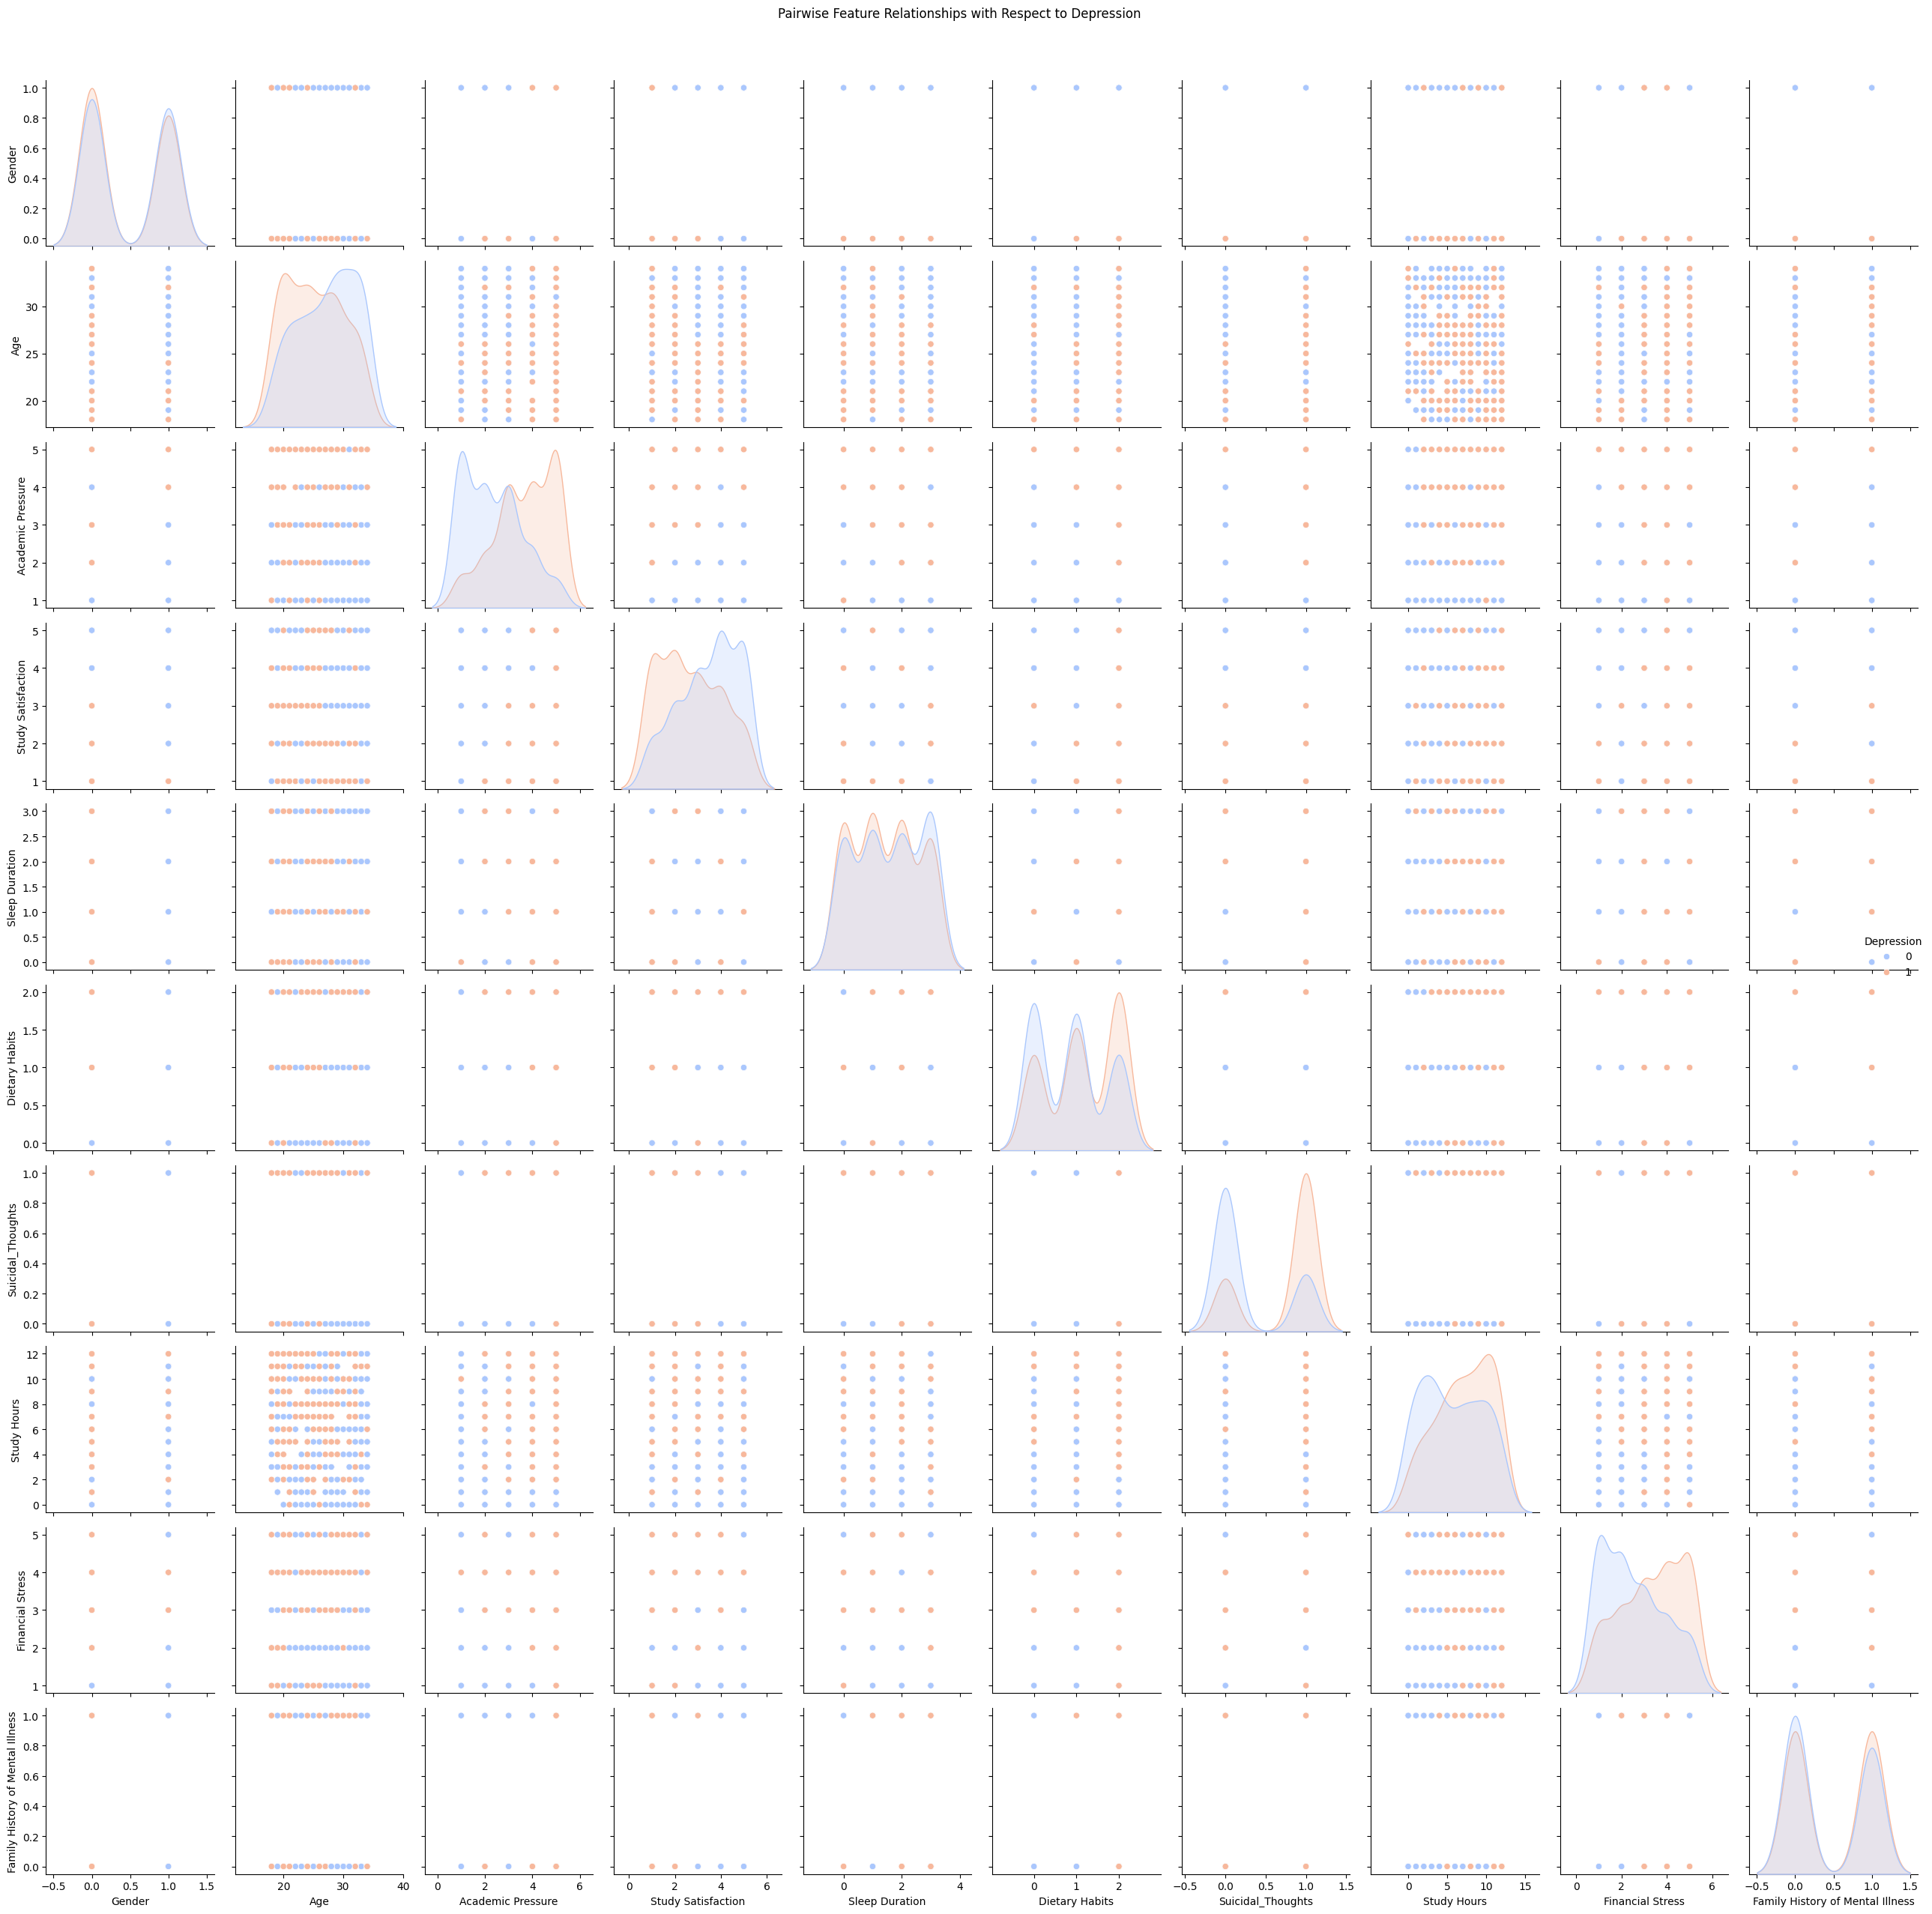

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename column for clarity if you haven't already (optional)
df = df.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal_Thoughts'})

# Select features (excluding target temporarily)
features = ['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
            'Sleep Duration', 'Dietary Habits', 'Suicidal_Thoughts',
            'Study Hours', 'Financial Stress', 'Family History of Mental Illness']

# Add target variable for coloring (hue)
features.append('Depression')

# Create the pairplot
sns.pairplot(df[features], hue='Depression', diag_kind='kde', palette='coolwarm')

plt.suptitle("Pairwise Feature Relationships with Respect to Depression", y=1.02)
plt.tight_layout()
plt.show()

